# Генеративно-состязательная нейросеть: ваша первая GAN-модель на PyTorch

Рассмотрим принципы построения генеративно-состязательных нейросетей (GAN) на примере двух моделей, реализованных с помощью фреймворка глубокого обучения PyTorch.

Текст статьи представляет собой незначительно сокращенный перевод публикации Ренато Кандидо [Generative Adversarial Networks: Build Your First Models](https://realpython.com/generative-adversarial-networks/).

Генеративно-состязательные сети (англ. Generative adversarial networks, сокр. GAN) – [нейронные сети](https://ru.wikipedia.org/wiki/%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D1%81%D0%B5%D1%82%D1%8C), которые умеют генерировать изображения, музыку, речь и тексты, похожие на те, что делают люди. GAN стали активной темой исследований последних лет. Директор лаборатории искусственного интеллекта Facebook [Ян Лекун](https://ru.wikipedia.org/wiki/%D0%9B%D0%B5%D0%BA%D1%83%D0%BD,_%D0%AF%D0%BD) назвал состязательное обучение «самой интересной идеей в области машинного обучения за последние 10 лет». Ниже мы изучим, как работают GAN и создадим две модели с помощью [фреймворка глубокого обучения](https://proglib.io/p/dl-frameworks) PyTorch.

---
**Примечание**. Материал этой статьи требует хотя бы поверхностного знакомства с нейросетями и Python. Вводные сведения об устройстве нейросетей можно получить из публикации [«Наглядное введение в нейросети на примере распознавания цифр»](https://proglib.io/p/neural-network-course).

---

# Что такое генеративно-состязательная нейросеть?

[Генеративно-состязательная нейросеть](https://ru.wikipedia.org/wiki/%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D1%82%D0%B8%D0%B2%D0%BD%D0%BE-%D1%81%D0%BE%D1%81%D1%82%D1%8F%D0%B7%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%81%D0%B5%D1%82%D1%8C) (англ. Generative adversarial network, сокращённо GAN) – это модель машинного обучения, умеющая имитировать заданное распределение данных. Впервые модель была предложена в [статье NeurIPS](https://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf) 2014 г. экспертом в глубоком обучении Яном Гудфеллоу и его коллегами.

GAN состоят из двух нейронных сетей, одна из которых обучена генерировать данные, а другая – отличать смоделированные данные от реальных (отсюда и «состязательный» характер модели). Генеративно-состязательные нейросети показывают впечатляющие результаты в отношении генерации изображений и видео:
* Перенос стилей ([CycleGAN](https://github.com/junyanz/CycleGAN/)) – преобразование одного изображения в соответствии со стилем других изображений (например, картин известного художника)
* Генерация человеческих лиц ([StyleGAN](https://en.wikipedia.org/wiki/StyleGAN)), реалистичные примеры доступны на сайте [This Person Does Not Exist](https://www.thispersondoesnotexist.com/).

---

**Примечание**. Последним успехам нейросетей посвящен тест Библиотеки программиста [«Правда или ложь: что умеют нейросети?»](https://proglib.io/tests/pravda-ili-lozh-chto-umeyut-neyroseti)

---

GAN и другие структуры, генерирующие данные, называют **генеративными моделями** в противовес более широко изученным **дискриминативным моделям**. Прежде чем погрузиться в GAN, посмотрим на различия между двумя типами моделей.

# Сравнение дискриминативных и генеративных моделей машинного обучения

Дискриминативные модели используются для большинства задач [«обучения с учителем»](https://ru.wikipedia.org/wiki/%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D1%81_%D1%83%D1%87%D0%B8%D1%82%D0%B5%D0%BB%D0%B5%D0%BC) на [классификацию](https://ru.wikipedia.org/wiki/%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8) или [регрессию](https://ru.wikipedia.org/wiki/%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7). В качестве примера проблемы классификации предположим, что нужно обучить [модель распознавания изображений рукописных цифр](https://proglib.io/p/neural-network-course). Для этого мы можем использовать маркированный набор данных, содержащий фотографии рукописных цифр, которым соотнесены сами цифры.

Обучение сводится к настройке параметров модели с помощью специального алгоритма, [минимизирующего функцию потерь](https://ru.wikipedia.org/wiki/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F_%D0%BF%D0%BE%D1%82%D0%B5%D1%80%D1%8C). Функция потерь – критерий расхождения между истинным значением оцениваемого параметра и его ожиданием. После фазы обучения мы можем использовать модель для классификации нового (ранее не рассматриваемого) изображения рукописной цифры, сопоставив входному изображению наиболее вероятную цифру.

![](https://files.realpython.com/media/fig_discriminative.9c22a1cd877d.png)
*Схема обучения дискриминативной модели*

Дискриминативная модель использует обучающие данные для нахождения границ между классами. Найденные границы используются, чтобы различить новые входные данные и предсказать их класс. В математическом отношении дискриминативные модели изучают [условную вероятность](https://ru.wikipedia.org/wiki/%D0%A3%D1%81%D0%BB%D0%BE%D0%B2%D0%BD%D0%B0%D1%8F_%D0%B2%D0%B5%D1%80%D0%BE%D1%8F%D1%82%D0%BD%D0%BE%D1%81%D1%82%D1%8C) $P(y|x)$ наблюдения $y$ при заданном входе $x$.

Дискриминативные модели – это не только нейронные сети, но и [логистическая регрессия](https://ru.wikipedia.org/wiki/%D0%9B%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F), и [метод опорных векторов (SVM)](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BE%D0%BF%D0%BE%D1%80%D0%BD%D1%8B%D1%85_%D0%B2%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%BE%D0%B2).

В то время как дискриминативные модели используются для контролируемого обучения, генеративные модели обычно используют неразмеченный набор данных, то есть могут рассматриваться как форма [обучения без учителя](https://ru.wikipedia.org/wiki/%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B1%D0%B5%D0%B7_%D1%83%D1%87%D0%B8%D1%82%D0%B5%D0%BB%D1%8F). Так, используя набор данных из рукописных цифр, можно обучить генеративную модель для генерации новых изображений.

![](https://files.realpython.com/media/fig_generative.5f01c08f5208.png)
*Схема обучения генеративной модели*

В отличие от дискриминативных моделей, генеративные модели изучают свойства [функции вероятности](https://ru.wikipedia.org/wiki/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F_%D0%B2%D0%B5%D1%80%D0%BE%D1%8F%D1%82%D0%BD%D0%BE%D1%81%D1%82%D0%B8) $P(x)$ входных данных $x$. В результате они порождают не предсказание, а новый объект со свойствами, родственными обучающему набору данных.

---

**Примечание**. Генеративные модели можно использовать и для размеченных наборов данных, но  когда речь идет о классификации, дискриминативные модели обычно работают лучше.

---

Помимо GAN существуют другие генеративные архитектуры:
* [Машина Больцмана](https://ru.wikipedia.org/wiki/%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%B0_%D0%91%D0%BE%D0%BB%D1%8C%D1%86%D0%BC%D0%B0%D0%BD%D0%B0)
* [Автокодировщик](https://ru.wikipedia.org/wiki/%D0%90%D0%B2%D1%82%D0%BE%D0%BA%D0%BE%D0%B4%D0%B8%D1%80%D0%BE%D0%B2%D1%89%D0%B8%D0%BA)
* [Скрытая марковская модель](https://ru.wikipedia.org/wiki/%D0%A1%D0%BA%D1%80%D1%8B%D1%82%D0%B0%D1%8F_%D0%BC%D0%B0%D1%80%D0%BA%D0%BE%D0%B2%D1%81%D0%BA%D0%B0%D1%8F_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C)
* Модели, предсказывающие следующее слово в последовательности, например, [GPT-2](https://en.wikipedia.org/wiki/OpenAI#GPT-2)

В последнее время GAN привлекли большое внимание благодаря впечатляющим результатам в генерации визуального контента. Остановимся на устройстве генеративно-состязательных сетей подробнее.

# Архитектура генеративно-состязательных нейросетей

Генеративно-состязательная сеть, как мы уже поняли, – это не одна сеть, а две: генератор и дискриминатор. Роль **генератора** – сгенерировать на основе реальной выборки датасет, напоминающий реальные данные. **Дискриминатор** обучен оценивать вероятность того, что образец получен из реальных данных, а не предоставлен генератором. Две нейросети играют в кошки-мышки: генератор пытается обмануть дискриминатор, а дискриминатор старается лучше идентифицировать сгенерированные образцы.

Чтобы понять, как работает обучение GAN, рассмотрим игрушечный пример с набором данных, состоящим из двумерных выборок $(x_1, x_2)$, с $x_1$ в интервале от $0$ до $2π$ и $x_2 = sin(x_1)$.

![](https://files.realpython.com/media/fig_x1x2.f8a39d8ff58a.png)

Общая структура GAN для генерации пар $(x̃_1, x̃_2)$, напоминающих точки набора данных, показана на следующем рисунке.

![](https://files.realpython.com/media/fig_gan.4f0f744c7999.png)

Генератор $G$ получает на вход пары случайных чисел ($z_1, z_2$), преобразуя их так, чтобы они напоминали примеры из реальной выборки. Структура нейронной сети $G$ может быть любой, например, [многослойный персептрон](https://ru.wikipedia.org/wiki/%D0%9C%D0%BD%D0%BE%D0%B3%D0%BE%D1%81%D0%BB%D0%BE%D0%B9%D0%BD%D1%8B%D0%B9_%D0%BF%D0%B5%D1%80%D1%86%D0%B5%D0%BF%D1%82%D1%80%D0%BE%D0%BD_%D0%A0%D1%83%D0%BC%D0%B5%D0%BB%D1%8C%D1%85%D0%B0%D1%80%D1%82%D0%B0) или [сверточная нейронная сеть](https://ru.wikipedia.org/wiki/%D0%A1%D0%B2%D1%91%D1%80%D1%82%D0%BE%D1%87%D0%BD%D0%B0%D1%8F_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D1%81%D0%B5%D1%82%D1%8C).

На вход дискриминатора $D$ попеременно поступают образцы из обучающего набора данных и смоделированные образцы, предоставленные генератором $G$. Роль дискриминатора заключается в оценке вероятности того, что входные данные принадлежат реальному набору данных. То есть обучение выполняется таким образом, чтобы $D$ выдавал $1$, получая реальный образец, и $0$ для сгенерированного образца.

Как и в случае с генератором, можно выбрать любую структуру нейронной сети $D$ с учетом размеров входных и выходных данных. В рассматриваемом примере вход является двумерным, а выходные данные – [скаляром](https://ru.wikipedia.org/wiki/%D0%A1%D0%BA%D0%B0%D0%BB%D1%8F%D1%80%D0%BD%D0%B0%D1%8F_%D0%B2%D0%B5%D0%BB%D0%B8%D1%87%D0%B8%D0%BD%D0%B0) в диапазоне от 0 до 1.

Процесс обучения GAN заключается в [минимаксной игре](https://ru.wikipedia.org/wiki/%D0%9C%D0%B8%D0%BD%D0%B8%D0%BC%D0%B0%D0%BA%D1%81) двух игроков, в которой $D$ адаптирован для минимизации ошибки различия реального и сгенерированного образца, а $G$ адаптирован на максимизацию вероятности того, что $D$ допустит ошибку.

На каждом этапе обучения происходит обновление параметров моделей $D$ и $G$. Чтобы обучить $D$, на каждой итерации мы помечаем выборку реальных образцов из обучающих данных единицами, а выборку сгенерированных образцов, созданных $G$ – нулями. Таким образом, для обновления параметров $D$, как показано на схеме, можно использовать обычный подход обучения с учителем.

![](https://files.realpython.com/media/fig_train_discriminator.cd1a1e32764f.png)
*Процесс обучения дискриминатора*

Для каждой партии обучающих данных, содержащих размеченные реальные и сгенерированные образцы, мы обновляем набор параметров модели $D$, минимизируя функцию потерь. После того как параметры $D$ обновлены, мы обучаем $G$ генерировать более качественные образцы. Набор параметров $D$ «замораживается» на время обучения генератора.

![](https://files.realpython.com/media/fig_train_generator.7196c4f382ba.png)

Когда $G$ начинает генерировать образцы настолько хорошо, что $D$ «обманывается», выходная вероятность устремляется к единице – $D$ считает, что все образцы принадлежат к оригинальной выборке.

Теперь, когда мы знаем, как работает GAN, мы готовы реализовать собственный вариант нейросети, используя **PyTorch**.

# Ваша первая генеративно-состязательная нейросеть

В качестве первого эксперимента с генеративно-состязательными сетями реализуем описаный выше пример с гармонической функцией. Для работы с примером будем использовать популярную библиотеку PyTorch, которую можно установить с помощью [инструкции](https://pytorch.org/get-started/locally/). Если вы серьезно заинтересовались Data Science, возможно, вы уже использовали дистрибутив [Anaconda](https://www.anaconda.com/products/individual) и систему управления пакетами и средами [conda](https://docs.conda.io/projects/conda/en/latest/user-guide/getting-started.html). Заметим, что среда облегчает процесс установки.

Если вы устанавливаете `pytorch` с помощью `conda`, вначале создайте окружение и активируйте его:

```Bash
$ conda create --name gan
$ conda activate gan
```

Здесь создается окружение `conda` с именем `gan`. Внутри созданной среды можно установить необходимые пакеты:


```Bash
$ conda install -c pytorch pytorch=1.4.0
$ conda install matplotlib jupyter
```

Поскольку PyTorch является активно развивающейся средой, API в новых версиях может измениться. Примеры кода проверены для версии 1.4.0.

Для работы с графиками мы будем использовать matplotlib.

Заметим также, что организация кода в виде [блокнотов Jupyter](https://proglib.io/p/jupyter) облегчает работу над проектами машинного обучения.

При использовании Jupyter Notebook необходимо зарегистрировать окружение `conda gan`, чтобы было можно создавать блокноты, используя это окружение в качестве кернела. Для этого в активированной среде `gan` выполняем следующую команду:

```Bash
$ python -m ipykernel install --user --name gan
```

Начнём с импорта необходимых библиотек:

In [1]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

Здесь мы импортируем библиотеку PyTorch (`torch`). Из библиотеки отдельно импортируем компонент `nn` для более компактного обращения. Встроенная библиотека `math` нужна лишь для получения значения константы `pi`, а упомянутый выше инструмент `matplotlib` – для построения зависимостей.

Хорошей практикой является временное закрепление генератора случайных чисел так, чтобы эксперимент можно было воспроизвести на другой машине. Чтобы сделать это в PyTorch, запустим следующий код:

In [2]:
torch.manual_seed(42)

Число 111 мы используем для инициализации генератора случайных чисел. Он нам понадобится для задания начальных весов нейронной сети. Несмотря на случайный характер эксперимента, его течение будет воспроизводимо.

# Подготовка данных для обучения

Обучающая выборка состоит из пар чисел $(x_1, x_2)$ – таких, что $x_2$ соответствует значению синуса $x_1$ для $x_1$ в интервале от $0$ до $2π$. Данные для обучения можно получить следующим образом:

In [3]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)]

Здесь мы составляем набор данных для обучения, состоящий из 1024 пар $(x_1, x_2)$. Затем инициализируем нулями `train_data` – матрицу из 1024 строк и 2 столбцов.

Первый столбец `train_data` заполняем случайными значениями в интервале от $0$ до $2π$. Вычисляем значения второго столбца, как синус от первого.

Затем нам формально потребуется массив меток `train_labels`, который мы передаем загрузчику данных PyTorch. Поскольку GAN реализует метод обучения без учителя, метки могут быть любыми.

Наконец, мы создаем из `train_data` и `train_labels` список кортежей `train_set`.

Отобразим данные для обучения, нанеся на график каждую точку $(x_1, x_2)$:

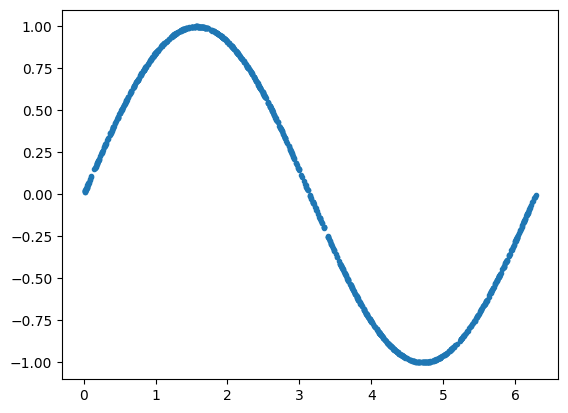

In [4]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

Вывод должен быть похож на следующий рисунок:

![](https://files.realpython.com/media/fig_train_sin_mpl.2e194bac5580.png)

Создадим загрузчик данных с именем `train_loader`, который будет перетасовывать данные из `train_set`, возвращая пакеты по 32 образца (`batch_size`), используемые для обучения нейросети:

In [5]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True)

Данные подготовлены, теперь нужно создать нейронные сети дискриминатора и генератора GAN.

# Реализация дискриминатора
В PyTorch модели нейронной сети представлены классами, которые наследуются от класса `nn.Module`. Если вы плохо знакомы с ООП, для понимания происходящего будет достаточно статьи [«Введение в объектно-ориентированное программирование (ООП) на Python»](https://proglib.io/p/vvedenie-v-obektno-orientirovannoe-programmirovanie-oop-na-python-2020-07-23).

Дискриминатор – это модель с двумерным входом и одномерным выходом. Он получает выборку из реальных данных или от генератора и предоставляет вероятность того, что выборка относится к реальным обучающим данным. Код ниже показывает, как создать класс дискриминатора:

In [6]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid())

    def forward(self, x):
        output = self.model(x)
        return output

Для построения модели нейронной сети используется стандартный метод классов `__init__()` . Внутри этого метода мы сначала вызываем `super().__init__()` для запуска соответствующего метода `__init__()` наследуемого класса `nn.Module`. В качестве архитектуры нейросети используется [многослойный перцептрон](https://ru.wikipedia.org/wiki/%D0%9C%D0%BD%D0%BE%D0%B3%D0%BE%D1%81%D0%BB%D0%BE%D0%B9%D0%BD%D1%8B%D0%B9_%D0%BF%D0%B5%D1%80%D1%86%D0%B5%D0%BF%D1%82%D1%80%D0%BE%D0%BD_%D0%A0%D1%83%D0%BC%D0%B5%D0%BB%D1%8C%D1%85%D0%B0%D1%80%D1%82%D0%B0). Его структура послойно задается с помощью `nn.Sequential()`. Модель имеет следующие характеристики:

- двумерный вход;
- первый скрытый слой состоит из 256 нейронов и имеет [функцию активации](https://ru.wikipedia.org/wiki/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F_%D0%B0%D0%BA%D1%82%D0%B8%D0%B2%D0%B0%D1%86%D0%B8%D0%B8) [ReLU](https://neurohive.io/ru/osnovy-data-science/activation-functions/);
- в последующих слоях происходит уменьшение числа нейронов до 128 и 64. Вывод имеет сигмоидальную функцию активации, характерную для представления вероятности (`Sigmoid`);
- чтобы избежать переобучения, после первого, второго и третьего скрытых слоев, делается дропаут части нейронов (`Dropout`).

Для удобства вывода в классе также создан метод `forward()`. Здесь `x` соответствует входу модели. В этой реализации выходные данные получаются путем подачи входных данных `x` в определенную нами модель без предобработки.

После объявления класса дискриминатора создаем его экземпляр:

In [7]:
discriminator = Discriminator()

# Реализация генератора

В генеративно-состязательных сетях генератор – это модель, которая берет в качестве входных данных некоторую выборку из [пространства скрытых переменных](https://ru.wikipedia.org/wiki/%D0%A1%D0%BA%D1%80%D1%8B%D1%82%D0%B0%D1%8F_%D0%BF%D0%B5%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D0%B0%D1%8F), напоминающих данные в обучающем наборе. В нашем случае это модель с двумерным вводом, которая будет получать случайные точки ($z_1, z_2$), и двумерный вывод, выдающий точки ($x̃_1, x̃_2$), похожие на точки из обучающих данных.

Реализация похожа на то, что мы написали для дискриминатора. Сначала нужно создать класс `Generator`, наследуемый от `nn.Module`, затем определить архитектуру нейронной сети, и, наконец, создать экземпляр объекта `Generator`:

In [8]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2))

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

Генератор включает два скрытых слоя с 16 и 32 нейронами с функцией активацией ReLU, а на выходе слой с двумя нейронами с линейной функцией активации. Таким образом, выходные данные будут состоять из двух элементов, имеющих значение в диапазоне от $-\infty$ до $+\infty$, которое будет представлять $(x̃_1, x̃_2)$. То есть исходно мы не накладываем на генератор никакие ограничения – он должен «всему научиться сам». 

Теперь, когда мы определили модели для дискриминатора и генератора, мы готовы начать обучение.

# Обучение моделей
Перед обучением моделей необходимо настроить параметры, которые будут использоваться в процессе обучения:

In [9]:
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()

Что здесь происходит:
1. Задаем скорость обучения `lr` (learning rate), которую мы будем использовать для адаптации весов сети.
2. Задаем количество эпох `num_epochs`, которое определяет, сколько повторений процесса обучения будет выполнено с использованием всего датасета.
3. Переменной `loss_function` мы назначаем функцию [логистической функции потерь](https://ru.wikipedia.org/wiki/%D0%9F%D0%B5%D1%80%D0%B5%D0%BA%D1%80%D1%91%D1%81%D1%82%D0%BD%D0%B0%D1%8F_%D1%8D%D0%BD%D1%82%D1%80%D0%BE%D0%BF%D0%B8%D1%8F) (бинарной перекрестной энтропии) `BCELoss()`. Это та функция потерь, которую мы будем использовать для обучения моделей. Она подходит как для обучения дискриминатора (его задача сводится к бинарной классификации), так и для генератора, так как он подает свой вывод на вход дискриминатора.

Правила обновления весов (обучения модели) в PyTorch реализованы в модуле `torch.optim`. Мы будем использовать  для обучения моделей дискриминатора и генератора алгоритм стохастического градиентного спуска [Аdam](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA#Adam). Чтобы создать оптимизаторы с помощью `torch.optim`, запустим следующий код:

In [10]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

Наконец, необходимо реализовать обучающий цикл, в котором образцы обучающей выборки подаются на вход модели, а их веса обновляются, минимизируя функцию потерь:

In [11]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Данные для обучения дискриминатора
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels))

        # Обучение дискриминатора
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Данные для обучения генератора
        latent_space_samples = torch.randn((batch_size, 2))

        # Обучение генератора
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels)
        loss_generator.backward()
        optimizer_generator.step()

        # Выводим значения функций потерь
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.08785365521907806
Epoch: 0 Loss G.: 2.6136229038238525
Epoch: 10 Loss D.: 0.5733547210693359
Epoch: 10 Loss G.: 1.0366215705871582
Epoch: 20 Loss D.: 0.5503675937652588
Epoch: 20 Loss G.: 0.9729368686676025
Epoch: 30 Loss D.: 0.649421215057373
Epoch: 30 Loss G.: 0.8088779449462891
Epoch: 40 Loss D.: 0.6870220303535461
Epoch: 40 Loss G.: 0.7493409514427185
Epoch: 50 Loss D.: 0.6557029485702515
Epoch: 50 Loss G.: 0.7843735814094543
Epoch: 60 Loss D.: 0.7168295383453369
Epoch: 60 Loss G.: 0.6611120700836182
Epoch: 70 Loss D.: 0.6769551038742065
Epoch: 70 Loss G.: 0.6927803754806519
Epoch: 80 Loss D.: 0.6857348680496216
Epoch: 80 Loss G.: 0.7350841760635376
Epoch: 90 Loss D.: 0.6882051825523376
Epoch: 90 Loss G.: 0.6928198933601379
Epoch: 100 Loss D.: 0.6816766858100891
Epoch: 100 Loss G.: 0.716012716293335
Epoch: 110 Loss D.: 0.6864780783653259
Epoch: 110 Loss G.: 0.6802864670753479
Epoch: 120 Loss D.: 0.6923151612281799
Epoch: 120 Loss G.: 0.6957827806472778
Epoch: 13

Здесь на каждой итерации обучения мы обновляем параметры дискриминатора и генератора. Как это обычно делается для нейронных сетей, учебный процесс состоит из двух вложенных циклов: внешний – для эпох обучения, а внутренний – для пакетов внутри каждой эпохи. Во внутреннем цикле всё начинается с подготовки данных для обучения дискриминатора:

- Получаем реальные образцы текущей партии из загрузчика данных и назначаем их переменной `real_samples`. Обратите внимание, что первое измерение в размерности массива имеет количество элементов, равное `batch_size`. Это стандартный способ организации данных в PyTorch, где каждая строка тензора представляет один образец из пакета.
* Используем `torch.ones()` для создания меток со значением 1 для реальных образцов и назначаем метки переменной `real_samples_labels`.
* Генерируем образцы, сохраняя случайные данные в `latent_space_samples`, которые затем передаем в генератор для получения `generate_samples`. Для меток сгенерированных образцов мы используем нули `torch.zeros()`, которые сохраняем в `generate_samples_labels`.
* Остается объединить реальные и сгенерированные образцы и метки и сохранить соответственно в `all_samples` и `all_samples_labels`.

В следующем блоке мы обучаем дискриминатор:

- В PyTorch важно на каждом шаге обучения очищать значения градиентов. Мы делаем это с помощью метода `zero_grad()`.
- Вычисляем выходные данные дискриминатора, используя обучающие данные `all_samples`.
- Вычисляем значение функции потерь, используя выходные данные в `output_discriminator` и метки `all_samples_labels`.
- Вычисляем градиенты для обновления весов с помощью `loss_discriminator.backward()`.
- Находим обновленные веса дискриминатора, вызывая `optimizer_discriminator.step()`.
- Подготавливаем данные для обучения генератора. Рандомизированные данные хранятся в `latent_space_samples`, количеством строк равно `batch_size`. Используем два столбца, чтобы данные соответствовали двумерным данным на входе генератора.

Тренируем генератор:
- Очищаем градиенты с помощью метода `zero_grad()`.
- Передаем генератору `latent_space_samples` и сохраняем его выходные данные в `generate_samples`.
- Передаем выходные данные генератора в дискриминатор и сохраняем его выходные данные в `output_discriminator_generated`, который будет использоваться в качестве выходных данных всей модели.
- Вычисляем функцию потерь, используя выходные данные системы классификации, сохраненные в `output_discriminator_generated` и метки `real_samples_labels`, равные 1.
- Рассчитываем градиенты и обновляем веса генератора. Помните, что когда мы обучаем генератор, мы сохраняем веса дискриминатора в замороженном состоянии. 

Наконец, в последних строчках цикла происходит вывод значения функций потерь дискриминатора и генератора в конце каждой десятой эпохи.

После запуска цикла обучение модели завершится через несколько минут.

# Проверка образцов, сгенерированных GAN

Генеративно-состязательные сети предназначены для генерации данных. Таким образом, после того как процесс обучения завершен, мы можем вызвать генератор для получения новых данных:

In [12]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)

Построим сгенерированные данные и проверим, насколько они похожи на обучающие данные. Перед построением графика для сгенерированных образцов необходимо применить `.detach()`, чтобы получить необходимые данные из вычислительного графа PyTorch:

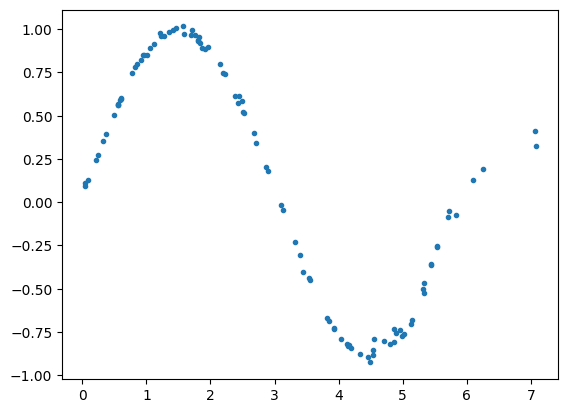

In [13]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")

Распределение сгенерированных данных очень напоминает реальные данные – исходный синус. Можно также визуализировать процесс обучения:

![](https://files.realpython.com/media/fig_gan_x1x2.69b1d6021da8.gif)

В начале процесса обучения распределение сгенерированных данных сильно отличается от реальных данных. Но по мере обучения генератор изучает реальное распределение данных, как бы подстраиваясь под него.

Теперь, когда мы реализовали первую модель генеративно-состязательной сети, мы можем перейти к более практичному примеру с генерацией изображений.

# Генератор рукописных цифр с GAN

В следующем примере мы воспользуемся GAN для генерации изображений рукописных цифр. Для этого мы обучим модели, используя [набор данных MNIST](https://ru.wikipedia.org/wiki/MNIST_(%D0%B1%D0%B0%D0%B7%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85)), состоящий из рукописных цифр. Этот стандартный набор данных включен в пакет `torchvision`.

Для начала в активированной среде `gan` необходимо установить `torchvision`:

```bash
$ conda install -c pytorch torchvision=0.5.0
```

Опять же, здесь мы указываем конкретную версию `torchvision` так же, как мы это делали с pytorch, чтобы обеспечить выполнение примеров кода. 

Начинаем с импорта необходимых библиотек:

In [14]:
import torchvision
import torchvision.transforms as transforms

torch.manual_seed(111)

Помимо библиотек, которые мы импортировали ранее, нам понадобится `torchvision` и `torchvision.transforms` для преобразования информации, хранящейся в файлах изображений.

Поскольку в этом примере обучающий набор включает изображения, модели будут сложнее, обучение будет происходить существенно дольше. При обучении на центральном процессоре ([CPU](https://ru.wikipedia.org/wiki/%D0%A6%D0%B5%D0%BD%D1%82%D1%80%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D1%86%D0%B5%D1%81%D1%81%D0%BE%D1%80)) на одну эпоху будет уходить порядка двух минут. Для получения приемлемого результата понадобится порядка 50 эпох, поэтому общее время обучения при использовании процессора составляет около 100 минут.

Чтобы сократить время обучения, можно использовать графический процессор ([GPU](https://ru.wikipedia.org/wiki/%D0%93%D1%80%D0%B0%D1%84%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%BF%D1%80%D0%BE%D1%86%D0%B5%D1%81%D1%81%D0%BE%D1%80)).

Чтобы код работал независимо от характеристик компьютера, создадим объект `device`, который будет указывать либо на центральный процессор, либо (при наличии) на графический процессор:

In [15]:
device = ""
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

Окружение настроено, подготовим датасет для обучения.

# Подготовка датасета MNIST
Набор данных MNIST состоит из изображений написанных от руки цифр от 0 до 9. Изображения выполнены в градациях серого и имеют размер 28 × 28 пикселей. Чтобы использовать их с PyTorch, понадобится выполнить некоторые преобразования. Для этого определим функцию `transform`, используемую при загрузке данных:

In [16]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

Функция состоит из двух частей:

1. `transforms.ToTensor()` преобразует данные в тензор PyTorch.
2. `transforms.Normalize()` преобразует диапазон тензорных коэффициентов.

Исходные коэффициенты, заданные функцией `transforms.ToTensor()`, находятся в диапазоне от 0 до 1. Поскольку изображения имеют черный фон, большинство коэффициентов равны 0.

---

**Технические детали**. Аргументы `transforms.Normalize()` представляют собой это два кортежа `(M₁, ..., Mₙ)` и `(S₁, ..., Sₙ)`, где `n` соответствует количеству каналов в изображении. Картинки в градациях серого, как в наборе данных MNIST, имеют лишь один канал. Для каждого i-го канала изображения `transforms.Normalize()` вычитает `Mᵢ` из коэффициентов и делит результат на `Sᵢ`.

---

Функция `transforms.Normalize()` изменяет диапазон коэффициентов на $[-1, 1]$, вычитая 0.5 из исходных коэффициентов и деля результат на 0.5. Преобразование сокращает количество элементов входных выборок, равных 0. Это помогает в обучении моделей.

Теперь можно загрузить обучающие данные, вызвав `torchvision.datasets.MNIST`:

In [17]:
train_set = torchvision.datasets.MNIST(
    root=".", train=True, download=True, transform=transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 77549552.98it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 23728833.27it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 20450749.75it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4570664.29it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



Аргумент `download = True` гарантирует, что при первом запуске кода набор данных MNIST будет загружен и сохранен в текущем каталоге, как указано в аргументе `root`.

Мы создали `train_set`, так что можно создать загрузчик данных, как делали это раньше:

In [18]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True)

Для избирательного построения данных воспользуемся matplotlib. В качестве палитры  хорошо подходит `cmap = gray_r`. Цифры будут изображаться черным цветом на белом фоне:

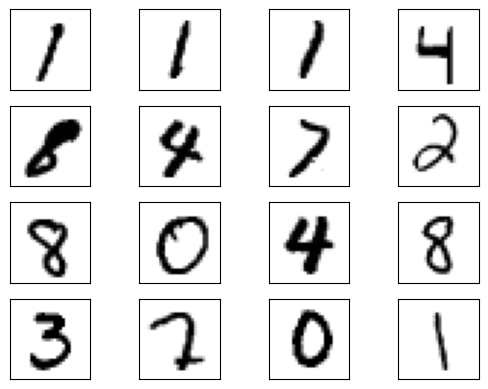

In [19]:
real_samples, mnist_labels = next(iter(train_loader))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(real_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

Вывод должен быть примерно таким:

![](https://files.realpython.com/media/fig_train_mnist_mpl.ddcdc8188b90.png)

Как видите, в датасете есть цифры с разными почерками. По мере того как GAN изучает распределение данных, она также генерирует цифры с разными стилями рукописного ввода.

Мы подготовили обучающие данные, можно реализовать модели дискриминатора и генератора.

# Реализация дискриминатора и генератора

В рассматриваемом случае дискриминатором является нейронная сеть многослойного перцептрона, которая принимает изображение размером 28 × 28 пикселей и находит вероятность того, что изображение принадлежит реальным обучающим данным.

Модель можно определить с помощью следующего кода:

In [20]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(x.size(0), 784)
        output = self.model(x)
        return output

Чтобы ввести коэффициенты изображения в нейронную сеть перцептрона, необходимо их векторизовать так, чтобы нейронная сеть получала вектор, состоящий из 784 коэффициентов (28 × 28 = 784).

Векторизация происходит в первой строке метода `forward()` – вызов `x.view()` преобразует форму входного тензора. Исходная форма тензора $x$ – `32 × 1 × 28 × 28`, где 32 – размер партии. После преобразования форма $x$ становится равной `32 × 784`, причем каждая строка представляет коэффициенты изображения обучающего набора.

Чтобы запустить модель дискриминатора с использованием графического процессора, нужно создать его экземпляр и связать с объектом устройства с помощью метода `.to()`:

In [21]:
discriminator = Discriminator().to(device=device)

Генератор будет создавать более сложные данные, чем в предыдущем примере. Поэтому необходимо увеличить размеры входных данных, используемых для инициализации. Здесь мы используем 100-мерный вход и выход с 784 коэффициентами. Результат организуется в виде тензора 28 × 28, представляющего изображение.

In [22]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )

    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output

generator = Generator().to(device=device)

Выходные коэффициенты должны находиться в интервале от -1 до 1. Поэтому на выходе генератора мы используем гиперболическую функцию активации `Tanh()`. В последней строке мы создаем экземпляр генератора и связываем его с объектом устройства.

Осталось лишь обучить модели.

# Обучение моделей
Для обучения моделей нужно определить параметры обучения и оптимизаторы:

In [23]:
lr = 0.0001
num_epochs = 10
loss_function = nn.BCELoss()

optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

Чтобы получить лучший результат, мы уменьшаем скорость обучения по сравнению с предыдущим примером. Чтобы сократить время обучения, устанавливаем количество эпох равным 50.

Цикл обучения похож на тот, что мы использовали в предыдущем примере:

In [24]:
for epoch in range(num_epochs):
    for n, (real_samples, mnist_labels) in enumerate(train_loader):
        # Данные для тренировки дискриминатора
        real_samples = real_samples.to(device=device)
        real_samples_labels = torch.ones((batch_size, 1)).to(
            device=device)
        latent_space_samples = torch.randn((batch_size, 100)).to(
            device=device)
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1)).to(
            device=device)
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels))

        # Обучение дискриминатора
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Данные для обучения генератора
        latent_space_samples = torch.randn((batch_size, 100)).to(
            device=device)

        # Обучение генератора
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels)
        loss_generator.backward()
        optimizer_generator.step()

        # Показываем loss
        if n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.5692477226257324
Epoch: 0 Loss G.: 0.4779079854488373
Epoch: 1 Loss D.: 0.06096681207418442
Epoch: 1 Loss G.: 3.8333747386932373
Epoch: 2 Loss D.: 0.011416683904826641
Epoch: 2 Loss G.: 5.403036594390869
Epoch: 3 Loss D.: 0.04152332991361618
Epoch: 3 Loss G.: 5.134734630584717
Epoch: 4 Loss D.: 0.006647448521107435
Epoch: 4 Loss G.: 6.727372169494629
Epoch: 5 Loss D.: 0.08717641979455948
Epoch: 5 Loss G.: 4.58128547668457
Epoch: 6 Loss D.: 0.1770595908164978
Epoch: 6 Loss G.: 3.0975842475891113
Epoch: 7 Loss D.: 0.06646732240915298
Epoch: 7 Loss G.: 3.1782543659210205
Epoch: 8 Loss D.: 0.16090232133865356
Epoch: 8 Loss G.: 2.8278183937072754
Epoch: 9 Loss D.: 0.434878408908844
Epoch: 9 Loss G.: 2.3554561138153076


# Проверка сгенерированных GAN образцов

Сгенерируем несколько образцов «рукописных цифр». Для этого передадим генератору инициирующий набор случайных чисел:

In [25]:
latent_space_samples = torch.randn(batch_size, 100).to(device=device)
generated_samples = generator(latent_space_samples)

Чтобы построить сгенерированные выборки, нужно переместить данные обратно в центральный процессор, если их обработка происходила на графическом процессоре. Для этого достаточно вызвать метод `cpu()`. Как и раньше, перед  построением данных необходимо вызвать `.detach()`:

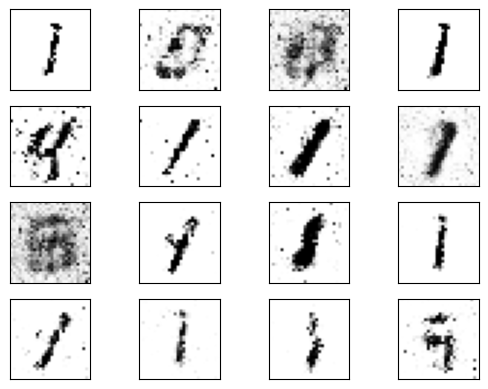

In [26]:
generated_samples = generated_samples.cpu().detach()

for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

На выходе должны получиться цифры, напоминающие обучющие данные.

![](https://files.realpython.com/media/fig_generated_mnist_mpl.ecc483e9dd9d.png)

После пятидесяти эпох обучения есть несколько цифр, которые как будто писала рука человека. Результаты можно улучшить, проводя более длительное обучение (с бо́льшим количеством эпох). Как и в предыдущем примере, можно визуализировать эволюцию обучения, используя фиксированный тензор входных данных и подавая его на генератор в конце каждой эпохи:

![](https://files.realpython.com/media/fig_gan_mnist.5d8784a85944.gif)

В начале процесса обучения сгенерированные изображения абсолютно случайны. По мере обучения генератор изучает распределение реальных данных, и примерно через двадцать эпох некоторые сгенерированные изображения цифр уже напоминают реальные данные.

# Заключение
Поздравляем! Вы узнали, как реализовать свою собственную генеративно-состязательную нейросеть. Сначала мы построили игрушечный пример, чтобы понять структуру GAN, а затем рассмотрели сеть для генерации изображений по имеющимся примерам данных.

Несмотря на сложность тематики GAN, интегрированные среды машинного обучения, такие как PyTorch, делают реализацию очень легкой.